In [2]:
import geopandas as gpd

In [5]:
# DO ONCE:
#df = gpd.read_file("https://opendata.arcgis.com/datasets/559d482bad0643f69cbe1538243e0baa_9.geojson")
#df.to_file("lec1download.geojson")

In [6]:
df = gpd.read_file("lec1download.geojson")
df.head()

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
0,2022-04-07T19:00:00+00:00,55079000101,None,1158,0,0.14,24,0,0.0,0,...,511,568,2022-04-06T06:00:00+00:00,4476,437.0,260,Census tract,7.500609e+06,11159.571995,"POLYGON ((-87.99418 43.19256, -87.99429 43.192..."
1,2022-04-07T19:00:00+00:00,55079000102,None,1159,1,0.43,19,0,0.0,0,...,561,508,2022-04-06T06:00:00+00:00,3468,404.0,261,Census tract,1.224474e+07,15500.211793,"POLYGON ((-87.99449 43.17769, -87.99512 43.177..."
2,2022-04-07T19:00:00+00:00,55079000201,None,1410,0,0.29,10,0,0.0,0,...,722,609,2022-04-06T06:00:00+00:00,5561,699.0,262,Census tract,1.488298e+07,17849.912522,"POLYGON ((-88.02435 43.17761, -88.02434 43.177..."
3,2022-04-07T19:00:00+00:00,55079000202,None,1728,0,0.71,11,0,0.0,0,...,913,738,2022-04-06T06:00:00+00:00,6439,621.0,263,Census tract,1.480524e+07,17742.064041,"POLYGON ((-88.02435 43.17761, -88.02518 43.177..."
4,2022-04-07T19:00:00+00:00,55079000301,None,411,1,0.14,4,0,0.0,0,...,218,172,2022-04-06T06:00:00+00:00,1485,92.0,264,Census tract,3.733793e+06,9142.114479,"POLYGON ((-88.05488 43.14699, -88.05511 43.146..."


<AxesSubplot:>

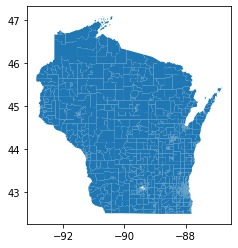

In [7]:
df.plot()

In [ ]:
# How can we get a clean dataset of COVID deaths in WI?

In [9]:
# cleanup based on documentation
# TODO: when sharing results, mention this, and % of times we swapped in value
df = df.replace(-999, 2) # -999 means between 0 and 4

In [10]:
# POP, POS_CUM_CP, POS_????_CP, DTH_CUM_CP
df.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

<AxesSubplot:xlabel='POP', ylabel='POS_CUM_CP'>

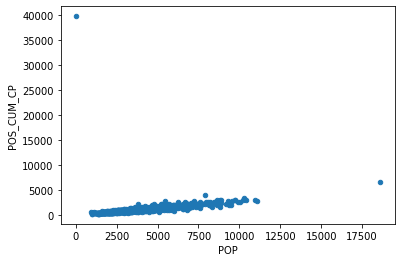

In [11]:
df.plot.scatter(x="POP", y="POS_CUM_CP")

In [14]:
df.sort_values(by="POS_CUM_CP", ascending=False).head(3)

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
916,2022-04-07T19:00:00+00:00,TRACT N/A,None,39838,21,12.43,406,0,0.0,0,...,17979,20213,2022-04-06T06:00:00+00:00,0,NaN,2668,Census tract,4.661914e+02,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."
241,2022-04-07T19:00:00+00:00,55009940001,None,6549,3,1.86,29,0,0.0,0,...,4691,1688,2022-04-06T06:00:00+00:00,18610,629.0,1201,Census tract,2.763480e+08,106951.691005,"POLYGON ((-88.10048 44.54828, -88.10064 44.548..."
1012,2022-04-07T19:00:00+00:00,55027960300,None,3879,0,0.57,29,0,0.0,0,...,1363,2386,2022-04-06T06:00:00+00:00,7928,40.0,2766,Census tract,2.580188e+07,27162.474970,"POLYGON ((-88.77561 43.59656, -88.77558 43.596..."


In [18]:
df["GEOID"].str.fullmatch(r"\d+").value_counts()

True    1392
Name: GEOID, dtype: int64

<AxesSubplot:xlabel='POP', ylabel='POS_CUM_CP'>

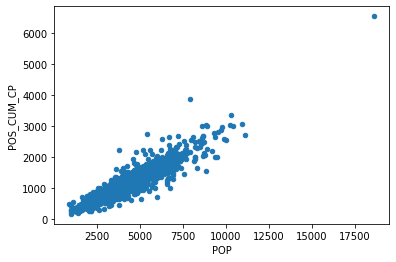

In [19]:
# cleanup based on browsing the data
# TODO: in presentation, state what % of deaths are excluded because we don't know geo
df = df[df["GEOID"].str.fullmatch(r"\d+")]
df.plot.scatter(x="POP", y="POS_CUM_CP")

In [20]:
# How can we train/fit models to known data to predict unknowns?
# Population => Deaths, Cases => Deaths, Cases by Age => Deaths

# GENERAL PATTERN
# model = ????
# model.fit(X, y)
# y2 = model.predict(X)

In [25]:
# for X values, sklearn wants DataFrames
# for y values, sklearn wants Series

df[["POP"]]
df["DTH_CUM_CP"]

0       24
1       19
2       10
3       11
4        4
        ..
1388    15
1389    23
1390     7
1391    22
1392    21
Name: DTH_CUM_CP, Length: 1392, dtype: int64

In [ ]:
from sklearn.linear_models import LinearRegression

model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X)

In [ ]:
# How can we visualize model predictions?

In [ ]:
# How can we get a formula for the relationship?

In [ ]:
# How well does our model fit the data?

In [ ]:
# Did our model learn, or just memorize (that is, "overfit")?

In [ ]:
# How can we minimize noise due to random train/test splits?

In [ ]:
# How can we compare models?

In [ ]:
# How can we use multiple x variables (multiple regression)?

In [ ]:
# How can we interpret what features the model is relying on?